<a href="https://colab.research.google.com/github/riskadchrn/finalexamp-kelaswork/blob/main/Case_2_housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inLine
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [ ]:
house = pd.read_csv('train_house.csv')
house


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [ ]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Mengahpus baris nilai NaN
data_cleaned = house.dropna()

In [ ]:
#separate numerical and categorical data
numerical_data = data_cleaned.select_dtypes(include=['int64', 'float64'])
categorical_data = data_cleaned.select_dtypes(include=['object'])

#display the structure of cleaned dataset and the separated data
numerical_data.shape, categorical_data.shape

((0, 38), (0, 43))

In [ ]:
#separate numerical and categorical data
data_numerical = house.select_dtypes("number")
data_categorical = house.select_dtypes("object")

# **# 1D Visualization**

# **Visualisasi Bar Chart, variabel kategorikal**

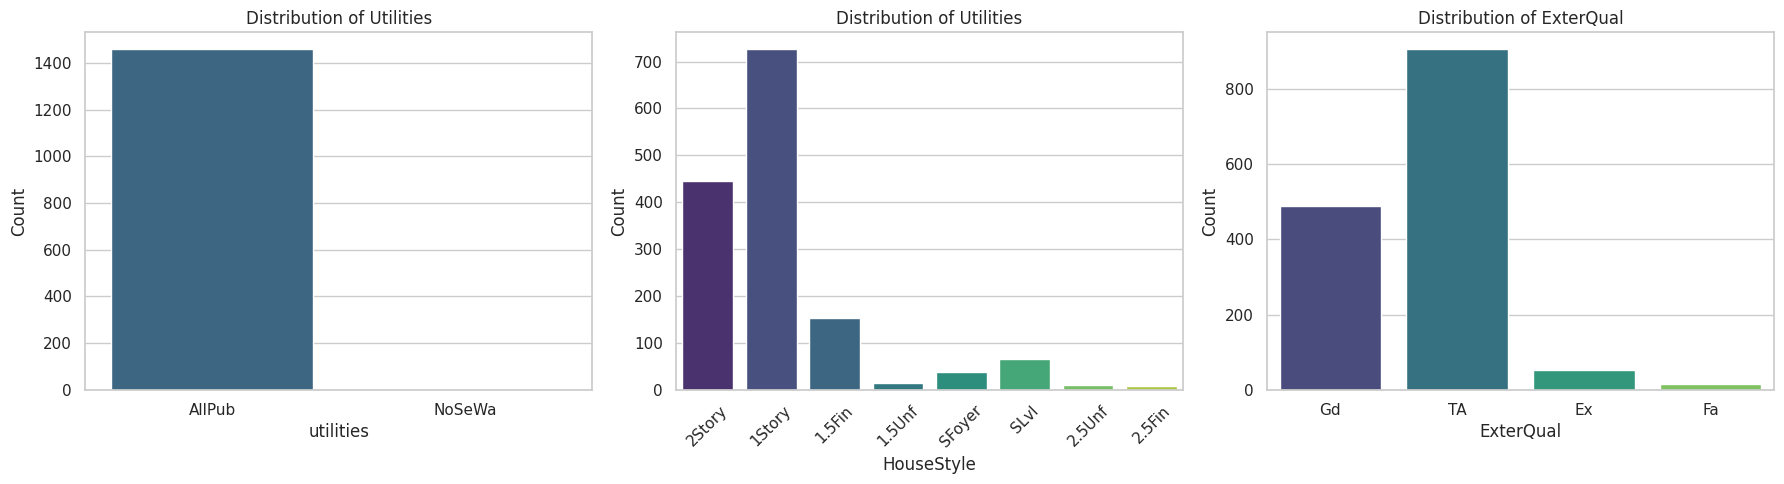

In [ ]:
sns.set(style="whitegrid")

#creating bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#utilities
sns.countplot(x='Utilities', data=house, ax=axes [0], palette='viridis')
axes[0].set_title('Distribution of Utilities')
axes[0].set_xlabel('utilities')
axes[0].set_ylabel('Count')

#housestyle
sns.countplot(x='HouseStyle', data=house, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Utilities')
axes[1].set_xlabel('HouseStyle')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

#ExterQual
sns.countplot(x='ExterQual', data=house, ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of ExterQual')
axes[2].set_xlabel('ExterQual')
axes[2].set_ylabel('Count')

#Adjusting layout
plt.tight_layout()
plt.show()


Berikut analisis berdasarkan ketiga grafik tersebut:
1. Utilities
- Allpub hampir mendominasi seluruh data yaitu sekitar >1400 rumah
- NoSeWa (tidak ada fasilitas publik) sangat sedikit, nyaris tidak signifikan.
- Variabel ini memiliki distribusi yang sangat timpang (imbalanced).

2. HouseStyle
- Tipe 1Story adalah yang paling banyak (±720), diikuti 2Story (±450).
- Tipe lain seperti 1.5Fin, SLvl, SFoyer jauh lebih sedikit, bahkan 2.5Unf hampir tidak ada.
- Mayoritas rumah merupakan rumah 1 lantai (1Story) atau 2 lantai (2Story), sedangkan gaya rumah yang unik (2.5 lantai, split foyer, dll.) sangat jarang.

3. ExterQual
- TA (Typical/Average) mendominasi (±900).
- Disusul Gd (Good) sekitar ±500.
- Ex (Excellent) dan Fa (Fair) jauh lebih sedikit.
- Sebagian besar rumah memiliki kualitas eksterior rata-rata hingga baik. Rumah dengan kualitas sangat bagus (Ex) jarang ditemukan, begitu pula yang kualitasnya rendah (Fa).

# **Visualisasi Histogram, variabel Numerikal**


**1. Sale Price**

             Median           Mean  Standard Deviation
SalePrice  163000.0  180921.195890        79442.502883
GrLivArea    1464.0    1515.463699          525.480383
PoolArea        0.0       2.758904           40.177307


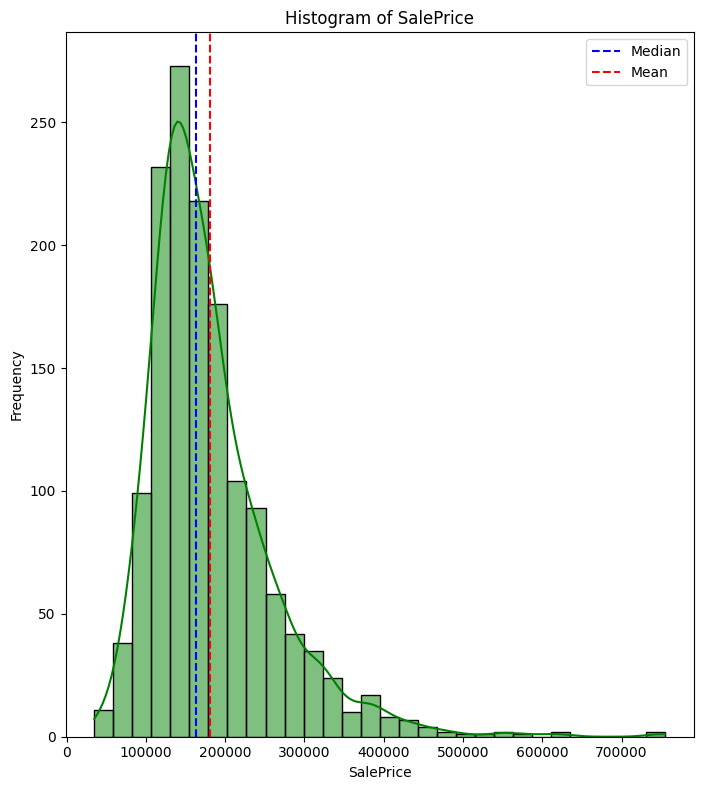

In [ ]:
# Menghitung Median, Mean, Standar Deviasi

statistics = {
    'Median' : {
        'SalePrice': data_cleaned['SalePrice'].median(),
        'GrLivArea': data_cleaned['GrLivArea'].median(),
        'PoolArea': data_cleaned['PoolArea'].median()
    },
    'Mean': {
        'SalePrice': data_cleaned['SalePrice'].mean(),
        'GrLivArea': data_cleaned['GrLivArea'].mean(),
        'PoolArea': data_cleaned['PoolArea'].mean(),
    },
    'Standard Deviation' : {
        'SalePrice': data_cleaned['SalePrice'].std(),
        'GrLivArea': data_cleaned['GrLivArea'].std(),
        'PoolArea': data_cleaned['PoolArea'].std()
    }}

# Menampilkan hasil statisti

statistics_df = pd.DataFrame(statistics)
print(statistics_df)

# histogram

plt.figure(figsize=(20, 8))

# histogram sale price

plt.subplot(1, 3, 1)
sns.histplot(data_cleaned['SalePrice'], kde=True, bins=30, color='green')
plt.axvline(statistics['Median']['SalePrice'], color='blue', linestyle='--', label='Median')
plt.axvline(statistics['Mean']['SalePrice'], color='red', linestyle='--', label='Mean')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

analisis:

Histogram miring ke kanan (right skewed), artinya sebagian rumah mayoritas pada kisaran yang rendah, sementara terdapat sedikit rumah dengan harga sangat tinggi (outlier).

garis merah (mean) berada dikanan garis biru (median). kondisi ini khas pada distribusi yang miring kekanan.

Harga rumah mayoritas berada di level menengah, dengan beberapa properti bernilai sangat tinggi yang menyebabkan distribusi miring ke kanan. Untuk analisis prediktif, median atau log-transformasi akan lebih tepat daripada langsung menggunakan mean.

**#Sale Price Log-10**

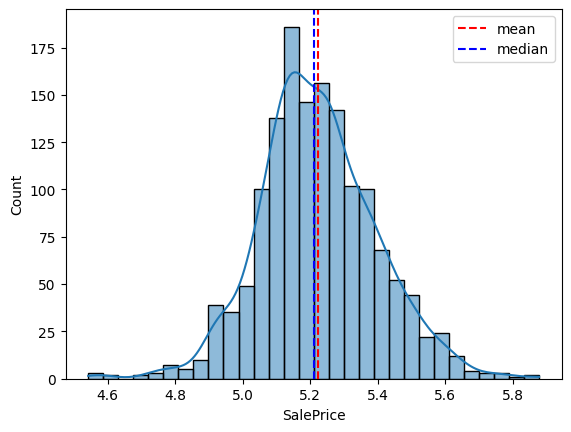

In [ ]:
data_numerical['SalePrice'] = np.log10(data_numerical['SalePrice']+1)
x = data_numerical['SalePrice']
sns.histplot(data_numerical['SalePrice'], bins=30, kde=True)
line1 = plt.axvline(x.mean(), color="r", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc= 1)
plt.show()

Analisis:

Garis mean (merah putus-putus) dan median (biru putus-putus) hampir berimpit.

Kondisi ini mengonfirmasi bahwa data sudah tidak skewed (tidak miring).

Insight untuk Modeling:

Distribusi yang mendekati normal sangat baik untuk model regresi linear atau algoritma lain yang mensyaratkan asumsi normalitas residual.

Karena mean ≈ median, penggunaan mean sebagai representasi pusat data sekarang lebih aman dibandingkan sebelum transformasi.

Kesimpulan:
Transformasi (misalnya log SalePrice) berhasil menormalkan distribusi yang awalnya miring ke kanan. Hal ini akan meningkatkan kinerja model prediktif, mempermudah interpretasi, dan mengurangi pengaruh outlier pada harga rumah.


**2**. **GrLivArea**

Median of GrLivArea: 1464.0
Mean of GrLivArea: 1515.463698630137
std (Standard Deviation) of GrLivArea: 525.4803834232027


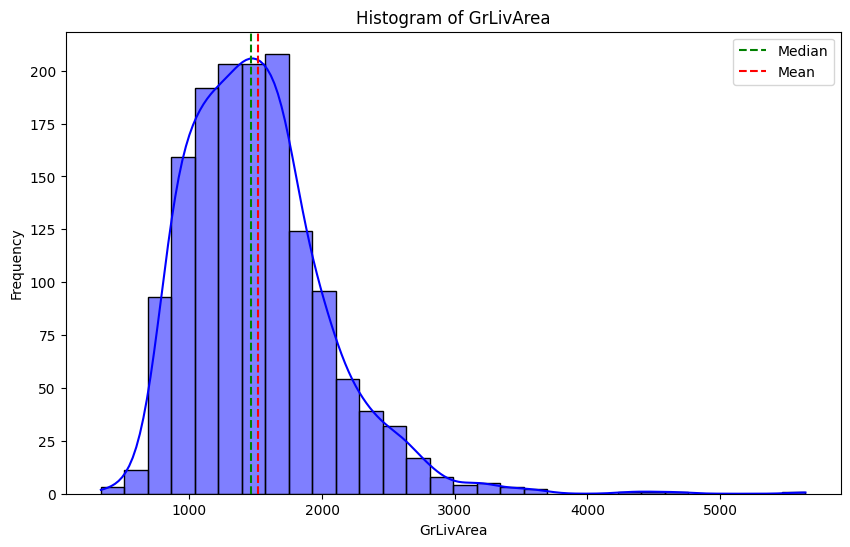

In [ ]:
# Hitung Media, Mean, dan Std Dev untuk GrLivArea

median_grlivarea = data_cleaned['GrLivArea'].median()
mean_grlivarea = data_cleaned['GrLivArea'].mean()
std_dev_grlivarea = data_cleaned['GrLivArea'].std()

#menampilkan hasil
print(f"Median of GrLivArea: {median_grlivarea}")
print(f"Mean of GrLivArea: {mean_grlivarea}")
print(f"std (Standard Deviation) of GrLivArea: {std_dev_grlivarea}")

#histogram GrLivArea
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['GrLivArea'], kde=True, bins=30, color='blue')

#menambahkan garis median, mean
plt.axvline(median_grlivarea, color='green', linestyle='--', label='Median')
plt.axvline(mean_grlivarea, color='red', linestyle='--', label='Mean')

plt.title('Histogram of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Analisis:
- Distribusi sedikit miring ke kanan (positively skewed)
- Sebagian besar rumah memiliki luas bangunan sekitar 1000 – 2000 sqft, sementara ada ekor panjang ke arah kanan hingga lebih dari 5000 sqft.
- Kehadiran rumah dengan ukuran sangat besar (outlier) membuat ekor kanan panjang.
- Garis mean (merah) sedikit berada di kanan garis median (hijau).
- Hal ini menunjukkan bahwa beberapa rumah berukuran sangat besar menarik rata-rata ke arah kanan, sesuai karakter distribusi right skew.


**#GrLivArea Log-10**

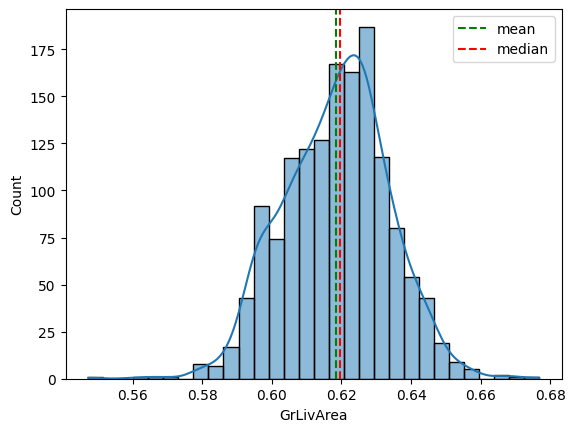

In [ ]:
data_numerical['GrLivArea'] = np.log10(data_numerical['GrLivArea'] + 1)
x = data_numerical['GrLivArea']
sns.histplot(data_numerical['GrLivArea'], bins=30, kde=True)
line1 = plt.axvline(x.mean(), color="g", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc= 1)
plt.show()

analisis:
- Histogram tampak simetris dan mendekati distribusi normal (bell-shaped).
- Tidak terlihat ekor panjang ke kiri atau ke kanan, berbeda dengan distribusi sebelum transformasi.
- Garis mean (hijau putus-putus) dan median (merah putus-putus) berimpit hampir sempurna
- Hal ini menunjukkan tidak ada skewness (kemiringan) yang signifikan.

kesimpulan:
Setelah transformasi, distribusi GrLivArea menjadi normal, mean dan median hampir sama, dan data bebas dari pengaruh skewness. Kondisi ini ideal untuk pemodelan prediktif karena mempermudah interpretasi dan memenuhi asumsi normalitas.

### **3. PoolArea**

Median of PoolArea: 0.0
Mean of PoolArea: 0.0
Standard Deviation (std) of PoolArea: 40.17730694453043


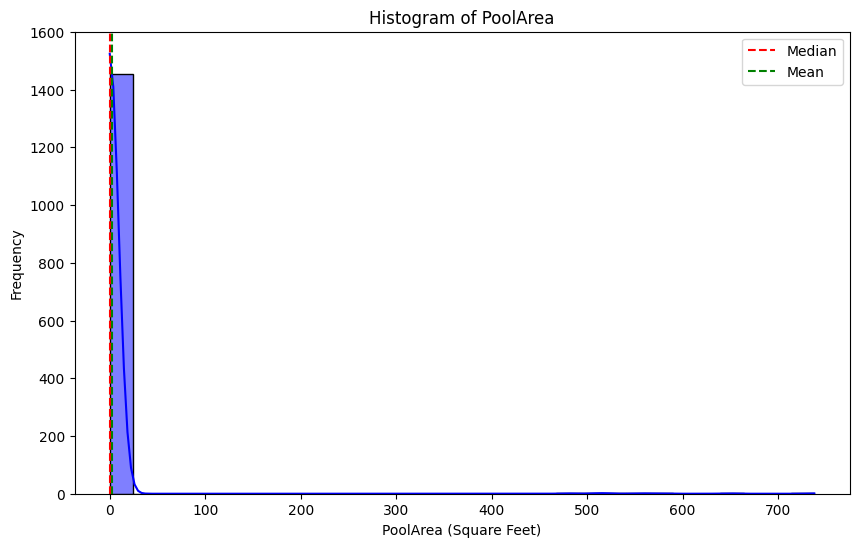

In [ ]:
#menghitung mean, median, dan std dev
median_poolarea = data_cleaned['PoolArea'].median()
mean_poolarea = data_cleaned['PoolArea'].mean()
std_dev_poolarea = data_cleaned['PoolArea'].std()

#hasil statistik
print(f"Median of PoolArea: {median_poolarea}")
print(f"Mean of PoolArea: {median_poolarea}")
print(f"Standard Deviation (std) of PoolArea: {std_dev_poolarea}")

#histogram untuk PoolArea
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PoolArea'], kde=True, bins=30, color='b')

#menambahkan garis mean, median
plt.axvline(median_poolarea, color='r', linestyle='--', label='Median')
plt.axvline(mean_poolarea, color='g', linestyle='--', label='Mean')

plt.title('Histogram of PoolArea')
plt.xlabel('PoolArea (Square Feet)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


Analisis:
Terlihat dalam distribusi data bahwa PoolArea highly right-skewed.
dan data tersebar di nilai 0, berarti menandakan kebanyakan rumah tidak memiliki kolam renang.

**#PoolArea Log-10**

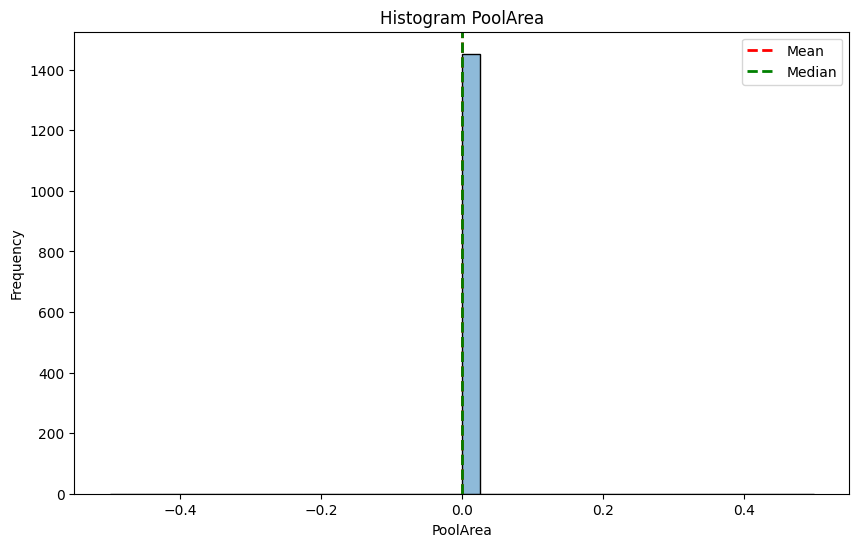

In [ ]:
data_numerical['PoolArea'] = data_numerical['PoolArea'][data_numerical['PoolArea'] < 2]
plt.figure(figsize=(10, 6))
sns.histplot(data_numerical['PoolArea'], bins=40, kde=True)
line1 = plt.axvline(x=data_numerical['PoolArea'].mean(), color='red', linestyle='dashed', linewidth=2)
line2 = plt.axvline(x=data_numerical['PoolArea'].median(), color='green', linestyle='dashed', linewidth=2)
plt.legend([line1, line2], ['Mean', 'Median'])
plt.title('Histogram PoolArea')
plt.xlabel('PoolArea')
plt.ylabel('Frequency')
plt.show()

Analisis:
- Garis mean (merah) dan median (hijau) berimpit tepat di nilai 0.

- Hal ini menandakan bahwa baik rata-rata maupun nilai tengah sama-sama nol, memperkuat indikasi bahwa kolam renang sangat jarang.

Kesimpulan:
Distribusi luas kolam renang sangat timpang dengan dominasi nilai 0. Artinya, sebagian besar rumah tidak memiliki kolam renang, dan keberadaan kolam renang merupakan kondisi langka yang dapat menjadi faktor premium pada harga rumah.

# 2D Visualization

## GrLivArea dengan SalePrice


Text(0, 0.5, 'SalePrice ($)')

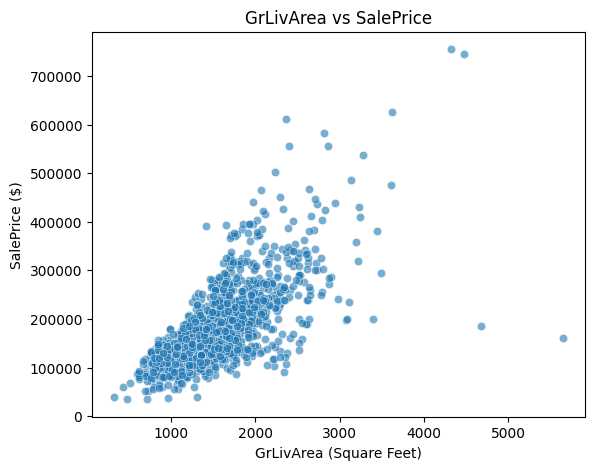

In [ ]:
#visualisasi GrLivArea dengan SalePrice
plt.figure(figsize=(14, 5))
#scatter plot GrLivArea vs SalePrice
plt.subplot(1, 2, 1)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house, alpha=0.6)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('SalePrice ($)')


analisis dari scatter plot GrLivArea vs SalePrice:
- Pola titik membentuk kemiringan positif: semakin besar luas area hunian di atas tanah (GrLivArea), semakin tinggi harga jual rumah (SalePrice).
- Luas area hunian (GrLivArea) memiliki pengaruh besar terhadap harga jual rumah (SalePrice). Rumah dengan area lebih besar cenderung lebih mahal, tetapi terdapat beberapa outlier yang dapat memengaruhi analisis dan perlu perhatian khusus.

## GarageArea dengan SalePrice


Text(0, 0.5, 'SalePrice ($)')

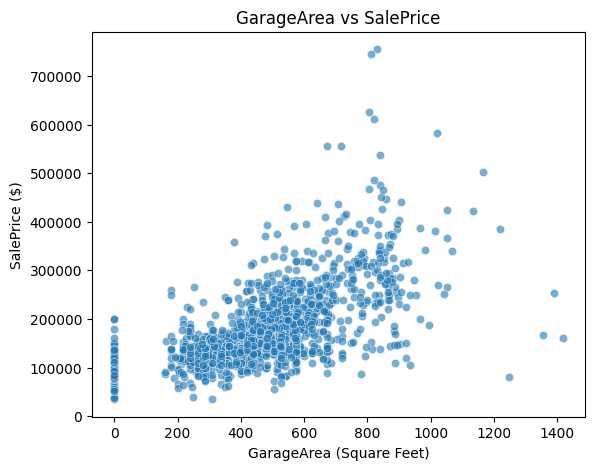

In [ ]:
#visualisasi GarageArea dengan SalePrice
plt.figure(figsize=(14, 5))
#scatter plot GarageArea vs SalePrice
plt.subplot(1, 2, 1)
sns.scatterplot(x='GarageArea', y='SalePrice', data=house, alpha=0.6)
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea (Square Feet)')
plt.ylabel('SalePrice ($)')

Analisis:
- Arah positif terlihat, artinya semakin luas area garasi, cenderung harga rumah semakin tinggi.
- Mayoritas rumah memiliki GarageArea sekitar 200–800 sq ft dan harga sekitar $100,000 – $300,000.

kesimpulan:
Luas garasi memiliki korelasi positif terhadap harga rumah, tetapi pengaruhnya relatif moderate dibanding luas area hunian. Rumah tanpa garasi masih bisa dijual dengan harga tinggi, sehingga variabel lain kemungkinan lebih menentukan harga secara keseluruhan.